# Linear Regression
## Vanilla Version

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

### data processing

In [15]:
#我们定义房价数据
# x指年份，减去了2009
# 10个样本，1个特征
# 10 x 1
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=np.float32).T # kp: [1,2] and [[1,2]] 样本数和特征数

# y指房价，除以了10000
# 10个样本，每个样本有一个真值
# 10 x 1
y = np.array([[1.8, 2.1, 2.3, 2.3, 2.85, 3.0, 3.3, 4.9, 5.45, 5.0]], dtype=np.float32).T # 这里习惯用列向量，一行表示一个样本

x = x / 10.0 # 之后我们一般用normalization kp: 归一化
y = y / 10.0

### train

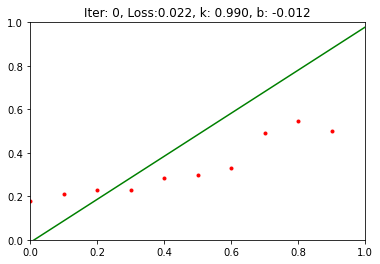

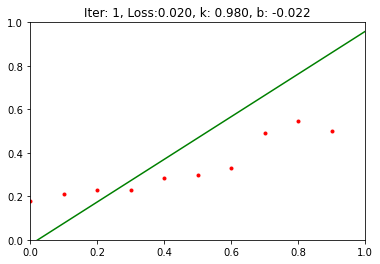

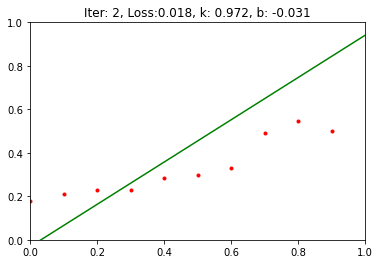

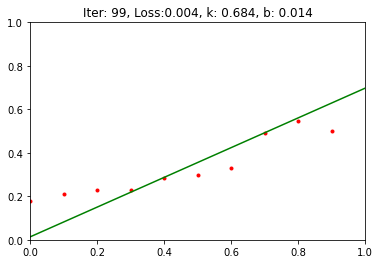

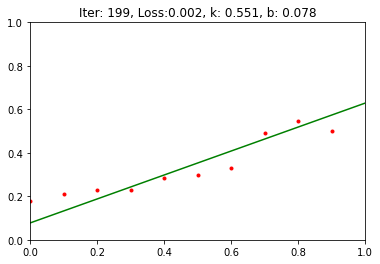

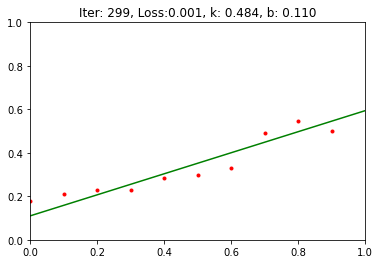

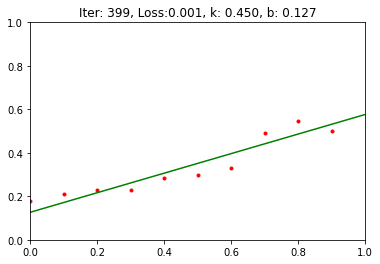

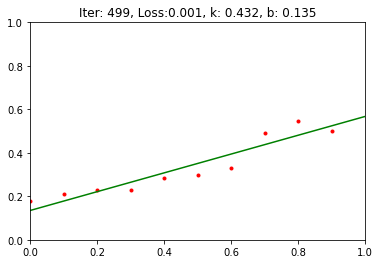

In [16]:
# 0. 初始化 k b
lr = 0.1
k = 1  # random.random()   通常初始化为随机数
b = 0
epochs = 500  # 总共迭代轮数
batch_size = x.shape[0]

# 创建一个新的画板
plt.figure()

for i in range(epochs):
    # 1. 做预测
    predict = k * x + b
    
    # 2. 算loss
    # 使用MSE计算loss
    loss = np.sum((y - predict)**2) * 0.5 / batch_size # 有奖竞猜为什么要除以batch_size 
    
    # 3. 算更新量
    # G
    # 写法1 分步写
    del_g = (y - predict) / batch_size # 有奖竞猜 既然 loss都已经除以了batchsize，这里为何又不需要了呢，求和符号去哪里了？
    del_predict = del_g * (-1) 
    # W
    del_k = np.sum(del_predict * x)    # 有奖竞猜，这里为什么不用了/batchsize  
    del_b = np.sum(del_predict * 1)
    
    # 写法2 一步写出来
#     del_k = np.sum((predict - y)*x)
#     del_b = np.sum(predict - y)
    
    
    # 4. 去更新
    k = k - lr * del_k
    b = b - lr * del_b
    
    
    # 5.（optional）log  ----> 以下的内容属于常用工具库的使用
    if (i + 1) % 100 == 0 or i < 3:
#         print(f"{i}") # for debug
        # 为了画模型的直线显示而用
        tx = np.array([[0,1]]).T  # tx ty 用来画两个点，两点一线
        ty = k * tx + b
#         print(tx,k)
        
        plt.clf() # 清理掉figure ref: https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
        plt.title(f"Iter: {i}, Loss:{loss:.3f}, k: {k:.3f}, b: {b:.3f}")
        plt.plot(x, y, "r.")  # kp: matplot usage    ref : https://github.com/matplotlib/cheatsheets   or   https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf
        plt.plot(tx, ty, "g-")
        
        # 锁定坐标系
        plt.axis([0,1,0,1])  # 尝试去改一改，搞一搞
        
        # 在窗口界面下有效，jupyter下无效
        # 等待并刷新，时间是0.01秒
        plt.pause(0.01)

        
    
    

In [17]:
k , b

(0.4322588161099702, 0.1349039909429849)

### test (inference)

In [18]:
px = (2021 - 2009) / 10.0
py = k * px + b
py = py * 10 # 单位是万元

print(f"预测2021年房价是：{py:.3f} 万元") # 知识点格式化输出 小数输出 和 Name Placeholders  ref: https://www.datacamp.com/community/tutorials/python-string-format?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061443&gclid=CjwKCAjw7rWKBhAtEiwAJ3CWLJw_xTYT4ykJiAij-T1qliZjQZoTEmpYNUQbCmahiXJbVJh-2_8otxoC-f0QAvD_BwE

预测2021年房价是：6.536 万元


In [19]:
# 先去看矩阵求导，看完再回来看

## Matrix Version

### data processing
(复制一份防止出错，前面可能不小心修改了原始数据)

In [20]:
#我们定义房价数据
# x指年份，减去了2009
# 10个样本，1个特征
# 10 x 1
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=np.float32).T # kp: [1,2] and [[1,2]] 样本数和特征数

# y指房价，除以了10000
# 10个样本，每个样本有一个真值
# 10 x 1
y = np.array([[1.8, 2.1, 2.3, 2.3, 2.85, 3.0, 3.3, 4.9, 5.45, 5.0]], dtype=np.float32).T # 这里习惯用列向量，一行表示一个样本

x = x / 10.0 # 之后我们一般用normalization kp: 归一化
y = y / 10.0

In [21]:
x.shape, y.shape

((10, 1), (10, 1))

In [22]:
num_sample = x.shape[0]
num_feature = x.shape[1]
num_output = 1
num_sample, "and ",num_feature

# 加个1
X = np.ones((num_sample, 1 + num_feature)) # (10, 2)
X[:, 1:] = x
X

array([[1.        , 0.        ],
       [1.        , 0.1       ],
       [1.        , 0.2       ],
       [1.        , 0.30000001],
       [1.        , 0.40000001],
       [1.        , 0.5       ],
       [1.        , 0.60000002],
       [1.        , 0.69999999],
       [1.        , 0.80000001],
       [1.        , 0.89999998]])

### train

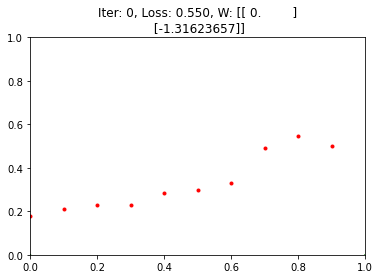

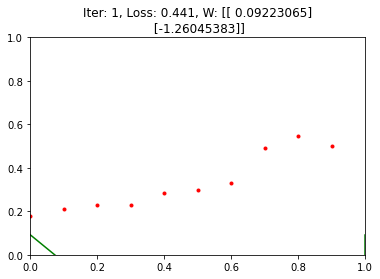

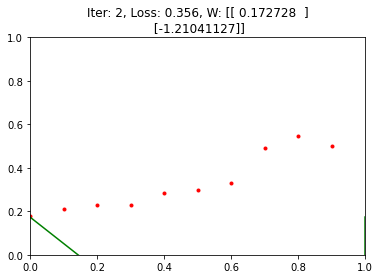

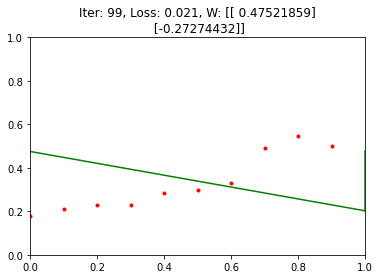

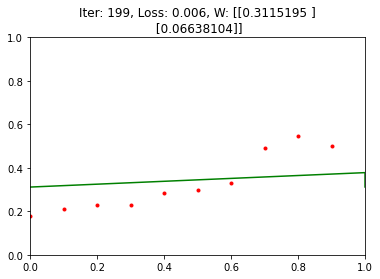

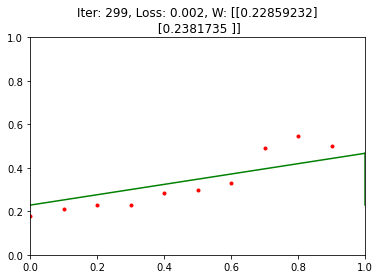

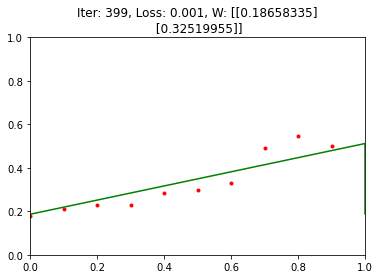

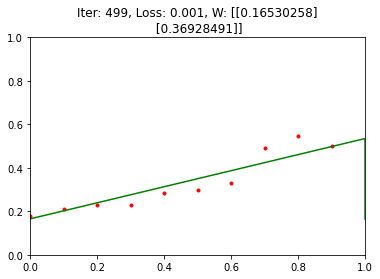

In [23]:
# 0. weight init
W = np.zeros((1 + num_feature, num_output)) #  # (10, 2) @ (2,1) = (10, 1) 

W[0] = 0
W[1:] = np.random.normal(0, 1.0, size = (num_feature, num_output))


epochs = 500
lr = 0.1
batch_size = X.shape[0]

for i in range(epochs):
    # 1. prediction
    predict =  X @ W      
    
    # 2. compute loss
    loss = np.sum(0.5 *(y - predict) ** 2) / batch_size
    
    # 3. amount to be updated
    G = (predict - y) / batch_size # G = dLoss/d_predict
    
    if (i + 1) % 100 == 0 or i < 3:  # 任务
        # 为了画模型的直线显示而用
        tx = np.array([
            [1, 0],
            [1, 1]
        ])
        ty = tx @ W
        
        plt.clf()
        plt.title(f"Iter: {i}, Loss: {loss:.3f}, W: {W}")
        plt.plot(x, y, "r.")
        plt.plot(tx, ty, "g-")
        
        # 锁定坐标系
        plt.axis([0, 1, 0, 1])
        
        # 在窗口界面下有效，jupyter下无效
        # 等待并刷新，时间是0.01秒
        plt.pause(0.01)
    
    del_W = X.T @ G # kp: 矩阵求导（超级超级超级重要，记住，背住）ab  思考：X.T @ G  还是 G @ X.T
    
    
    # 4. update
    W = W - lr * del_W
    
    
    


